In [146]:
# Importing all libraries required.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sp

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [162]:
## Data Understanding
# Read CSV file and check it's attributes before proceeding further.
# Reading CSV file with dtype object. I will draw correlation among few variables not all so when it needs i will just convert 
# those as per my need for better visibility. So many variables in correlation creates confusion when they don't add much value.
df = pd.read_csv('loan.csv')
df.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
df = df.sort_values('loan_amnt',ascending=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39397,211133,210644,500,500,475.0,36 months,11.41%,16.47,C,C3,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39544,164346,163835,500,500,400.0,36 months,8.07%,15.69,A,A4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
38863,312505,312443,500,500,450.0,36 months,9.76%,16.08,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39373,216698,174214,500,500,500.0,36 months,10.46%,16.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39275,242695,242682,500,500,500.0,36 months,10.71%,16.31,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [138]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Loan_Class
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,2786.000000,39717.0,39717.0,39717.0,39661.0,39717.0,39717.000000,39717.0,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,324.561922,6.896893e+04,13.315130,35.900962,69.698134,0.0,1.0,0.0,0.0,0.0,0.043260,0.0,0.858323
std,7456.670694,7187.238670,7128.450439,10.622815,208.874874,6.379377e+04,6.678594,22.020060,43.822529,0.0,0.0,0.0,0.0,0.0,0.202523,0.0,0.348723
min,500.000000,500.000000,0.000000,36.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,167.020000,4.040400e+04,8.170000,18.000000,22.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,280.220000,5.900000e+04,13.400000,34.000000,90.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,430.780000,8.230000e+04,18.600000,52.000000,104.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000
max,35000.000000,35000.000000,35000.000000,60.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,1.000000


<AxesSubplot:>

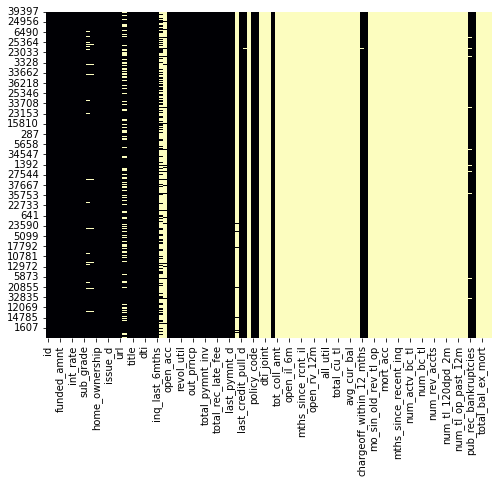

In [13]:
#Creating the heatmap
plt.figure(figsize = (8,6))
sp.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [14]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [15]:
print(df.shape)


(39717, 111)


In [18]:
#Dropping the missing rows.
df_dropped = df.dropna(how = 'any')

In [19]:
print(df.shape)

(39717, 111)


In [22]:
df_new = df
df_new['tax_liens'] = df_new['tax_liens'].fillna((df_new['tax_liens'].mean()))


In [34]:
#printing the dataframes after replacing null values
print(df_new.isna().sum())
print(df.isna().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [24]:
df.duplicated().sum()

0

In [28]:
df_new= df.dropna(axis=1)

In [35]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39397,211133,210644,500,500,475.0,36 months,11.41%,16.47,C,C3,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39544,164346,163835,500,500,400.0,36 months,8.07%,15.69,A,A4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
38863,312505,312443,500,500,450.0,36 months,9.76%,16.08,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39373,216698,174214,500,500,500.0,36 months,10.46%,16.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39275,242695,242682,500,500,500.0,36 months,10.71%,16.31,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [32]:
#Drop columns having NA values
df_new = df.dropna(how='all')


In [33]:
print(df_new.isna().sum())
print(df.isna().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [46]:
df.drop(df.columns[[107, 108, 109,110]], axis=1, inplace=True)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_op_past_12m      39717
pct_tl_nvr_dlq          39717
percent_bc_gt_75        39717
pub_rec_bankruptcies      697
tax_liens                   0
Length: 107, dtype: int64


In [49]:
df = df_new

In [50]:
print(df_new.isna().sum())
print(df.isna().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [51]:
df_new.drop(df.columns[[107, 108, 109,110]], axis=1, inplace=True)

In [52]:
print(df_new.isna().sum())
print(df.isna().sum())

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_op_past_12m      39717
pct_tl_nvr_dlq          39717
percent_bc_gt_75        39717
pub_rec_bankruptcies      697
tax_liens                   0
Length: 107, dtype: int64
id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_op_past_12m      39717
pct_tl_nvr_dlq          39717
percent_bc_gt_75        39717
pub_rec_bankruptcies      697
tax_liens                   0
Length: 107, dtype: int64


In [53]:
df_new['pub_rec_bankruptcies'] = df_new['pub_rec_bankruptcies'].fillna((df_new['pub_rec_bankruptcies'].mean()))

In [54]:
print(df_new.isna().sum())
print(df.isna().sum())

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_op_past_12m      39717
pct_tl_nvr_dlq          39717
percent_bc_gt_75        39717
pub_rec_bankruptcies        0
tax_liens                   0
Length: 107, dtype: int64
id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_op_past_12m      39717
pct_tl_nvr_dlq          39717
percent_bc_gt_75        39717
pub_rec_bankruptcies        0
tax_liens                   0
Length: 107, dtype: int64


In [60]:
df_new.columns.get_loc("percent_bc_gt_75")

104

In [61]:
df_new.drop(df.columns[[102, 103, 104]], axis=1, inplace=True)

In [62]:
print(df_new.isna().sum())
print(df.isna().sum())

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_120dpd_2m        39717
num_tl_30dpd            39717
num_tl_90g_dpd_24m      39717
pub_rec_bankruptcies        0
tax_liens                   0
Length: 104, dtype: int64
id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_tl_120dpd_2m        39717
num_tl_30dpd            39717
num_tl_90g_dpd_24m      39717
pub_rec_bankruptcies        0
tax_liens                   0
Length: 104, dtype: int64


In [88]:
#customer bahaviour variables NEEDS TO BE DROPPED AS THEY ARE NOT NEEDED AT CREDIT APPROVAL
#delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
#total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
df_new.drop(df.columns[[25,26,27,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,46,48,52]], axis=1, inplace=True)

In [95]:
#Cleaning data with NAn values
df_new.drop(df.columns[[78,79,80]], axis=1, inplace=True)

In [96]:
print(df_new.isna().sum())
print(df.isna().sum())

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_rev_accts           39717
num_rev_tl_bal_gt_0     39717
num_sats                39717
pub_rec_bankruptcies        0
tax_liens                   0
Length: 80, dtype: int64
id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
num_rev_accts           39717
num_rev_tl_bal_gt_0     39717
num_sats                39717
pub_rec_bankruptcies        0
tax_liens                   0
Length: 80, dtype: int64


In [97]:
df_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pub_rec_bankruptcies,tax_liens
39397,211133,210644,500,500,475.0,36 months,11.41%,16.47,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04326,0.0
39544,164346,163835,500,500,400.0,36 months,8.07%,15.69,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04326,0.0
38863,312505,312443,500,500,450.0,36 months,9.76%,16.08,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.0
39373,216698,174214,500,500,500.0,36 months,10.46%,16.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04326,0.0
39275,242695,242682,500,500,500.0,36 months,10.71%,16.31,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04326,0.0


In [98]:
total= df_new.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
open_il_12m,39717,100.0
bc_open_to_buy,39717,100.0
annual_inc_joint,39717,100.0
dti_joint,39717,100.0
verification_status_joint,39717,100.0
tot_coll_amt,39717,100.0
tot_cur_bal,39717,100.0
open_acc_6m,39717,100.0
open_il_6m,39717,100.0
bc_util,39717,100.0


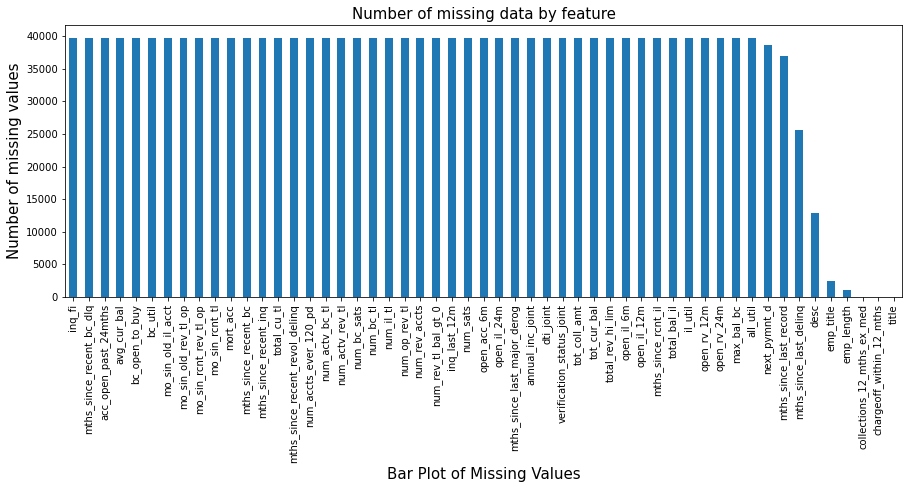

In [99]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [100]:
# Any variable having missing values more than 50 percent are removed
df.drop(["open_il_12m","bc_open_to_buy","annual_inc_joint","dti_joint","verification_status_joint","tot_coll_amt",
        "tot_cur_bal","open_acc_6m","open_il_6m","bc_util",
        "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util",
        "open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
        "inq_last_12m","acc_open_past_24mths","mths_since_last_major_derog","mo_sin_old_il_acct"], axis=1,
           inplace=True)


In [101]:
# Delete unwanted columns
df.drop(["id", "url", "member_id"], axis=1, inplace=True)

# Payment plan has all the values "n" and only 3 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

# Since we have both address state and zip code let's drop zip code and use address state only
df.drop(["zip_code"], axis=1, inplace=True)

# Title is not important instead we will use "purpose" variable
df.drop(["title"], axis=1, inplace=True)

# The grade is implied by the subgrade, so let's drop the grade column.
df.drop(["grade"], axis=1, inplace=True)


In [102]:
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

In [103]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
mo_sin_old_rev_tl_op,39717,100.0
num_bc_tl,39717,100.0
mths_since_recent_bc_dlq,39717,100.0
mths_since_recent_inq,39717,100.0
mths_since_recent_revol_delinq,39717,100.0
num_accts_ever_120_pd,39717,100.0
mo_sin_rcnt_rev_tl_op,39717,100.0
num_actv_bc_tl,39717,100.0
num_actv_rev_tl,39717,100.0
mths_since_recent_bc,39717,100.0


In [104]:
df.drop(["mo_sin_old_rev_tl_op","num_bc_tl","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq","num_accts_ever_120_pd",
        "mo_sin_rcnt_rev_tl_op","num_actv_bc_tl","num_actv_rev_tl","mths_since_recent_bc",
        "num_bc_sats","num_il_tl","mort_acc","avg_cur_bal",
        "num_op_rev_tl"], axis=1,
           inplace=True)

In [105]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
num_sats,39717,100.000000
num_rev_tl_bal_gt_0,39717,100.000000
num_rev_accts,39717,100.000000
mo_sin_rcnt_tl,39717,100.000000
next_pymnt_d,38577,97.129693
mths_since_last_record,36931,92.985372
mths_since_last_delinq,25682,64.662487
desc,12940,32.580507
emp_title,2459,6.191303
emp_length,1075,2.706650


In [106]:
df.drop(["num_sats","num_rev_tl_bal_gt_0","num_rev_accts","mo_sin_rcnt_tl"], axis=1,
           inplace=True)

In [107]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
next_pymnt_d,38577,97.129693
mths_since_last_record,36931,92.985372
mths_since_last_delinq,25682,64.662487
desc,12940,32.580507
emp_title,2459,6.191303
emp_length,1075,2.706650
chargeoff_within_12_mths,56,0.140998
collections_12_mths_ex_med,56,0.140998
addr_state,0,0.000000
pub_rec_bankruptcies,0,0.000000


Text(0, 0.5, 'Loan Amount')

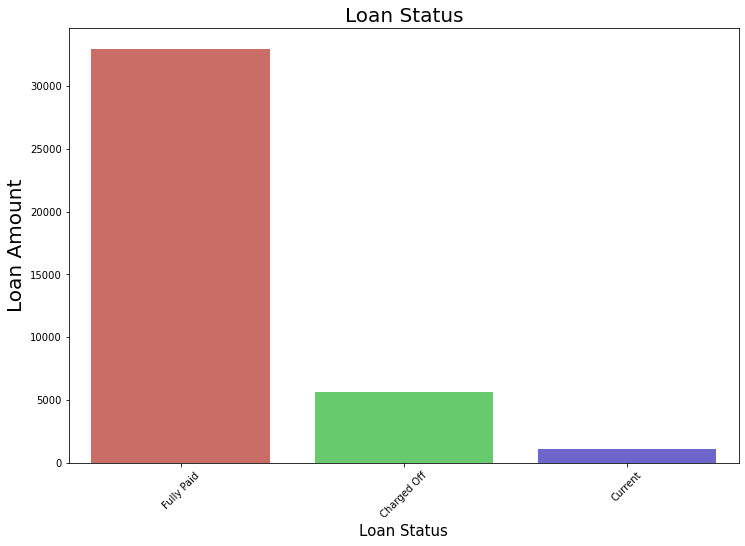

In [109]:
# Loan Status
plt.figure(figsize = (12,8))
g = sp.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [113]:
# mode value in place of the missing value
df_new["emp_title"].value_counts(ascending=False).head()
df_new["emp_title"]= df["emp_title"].fillna(df["emp_title"].mode()[0])

In [114]:
df_new["emp_length"].value_counts(ascending=False).head()
df_new["emp_length"]= df["emp_length"].fillna(df["emp_length"].mode()[0])

In [118]:
df_new["purpose"].value_counts(ascending=False).head()
df_new["purpose"]= df["purpose"].fillna(df["purpose"].mode()[0])

In [119]:
df_new["collections_12_mths_ex_med"].value_counts()
df_new["collections_12_mths_ex_med"]= df["collections_12_mths_ex_med"].fillna(df["collections_12_mths_ex_med"].mode()[0])

In [121]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [122]:
# Create a target variable "Loan Status" with two categories Good and Bad Loan
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status== "Issued") |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

Text(0, 0.5, 'Loan Amount')

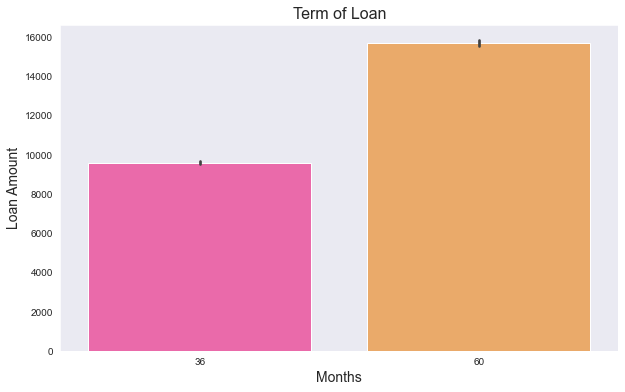

In [159]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(10,6))
sp.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

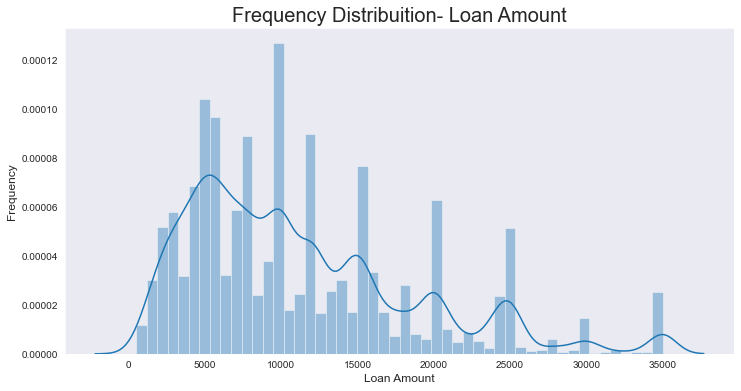

In [158]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sp.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

Text(0, 0.5, 'Loan Amount')

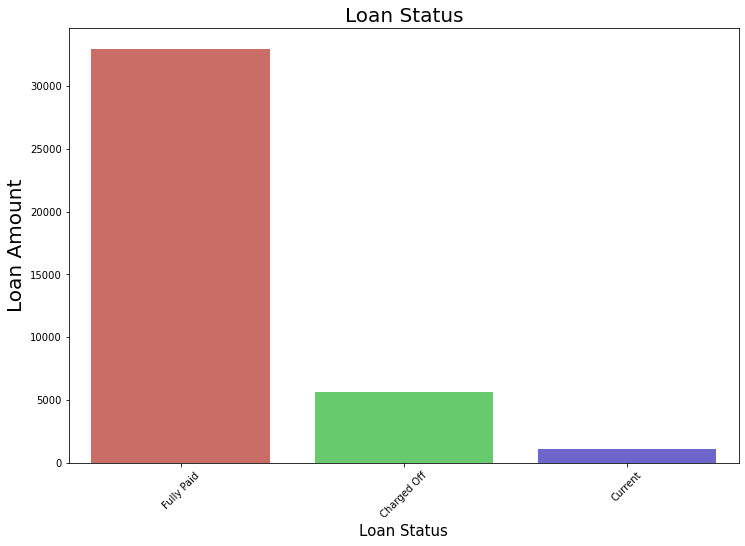

In [127]:
# Loan Status vs Loan Amount
plt.figure(figsize = (12,8))
g = sp.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

Text(0, 0.5, 'Loan Amount')

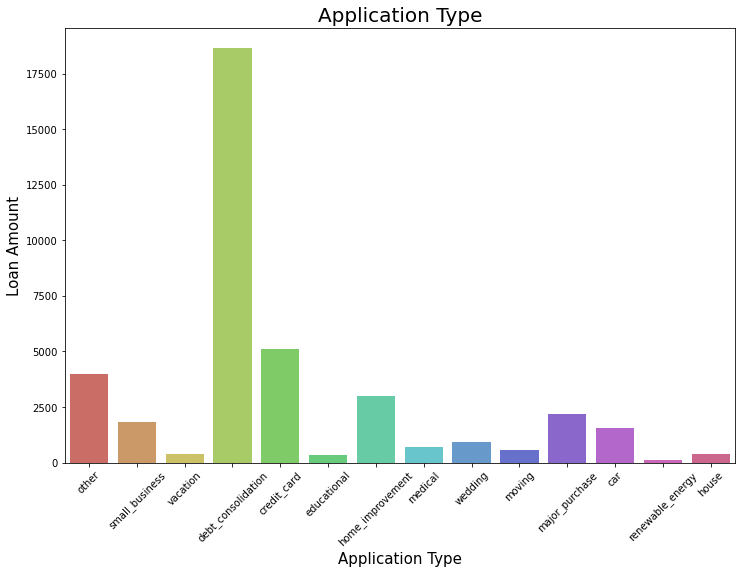

In [128]:
# Application Type and Loan Amount
plt.figure(figsize = (12,8))
g = sp.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

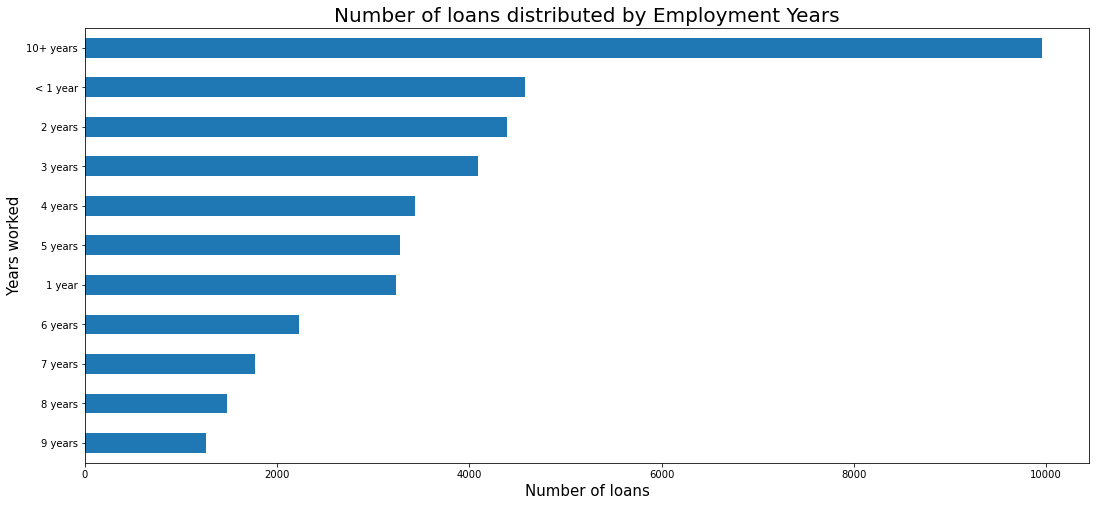

In [131]:
# Employment Length and Number of Loans
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

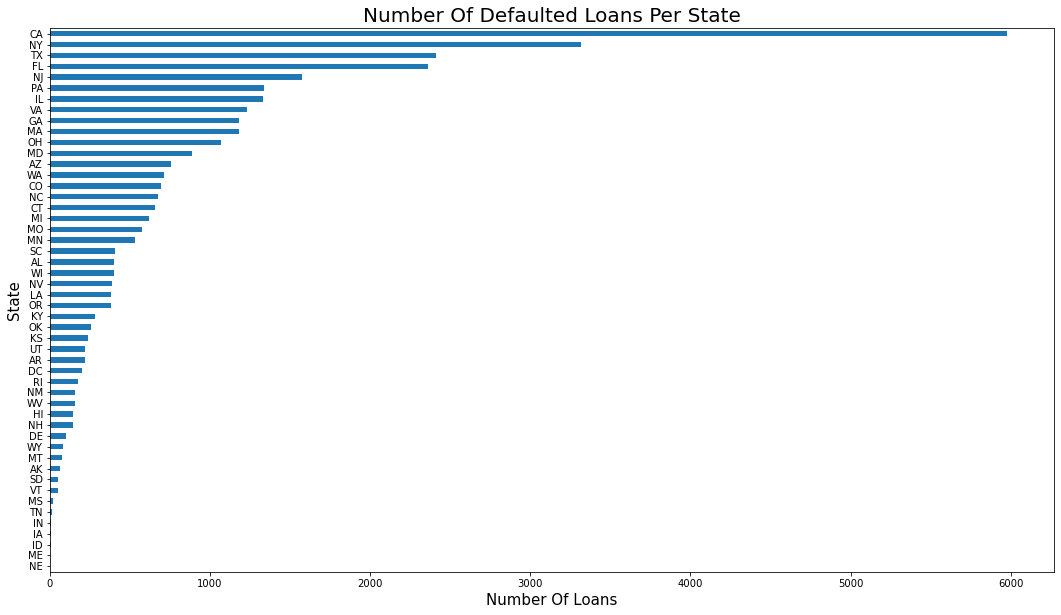

In [132]:
# No of Defaulted Loans per State
fig = plt.figure(figsize=(18,10))
df[df['Loan_Class']==1].groupby('addr_state')['Loan_Class'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number Of Defaulted Loans Per State',fontsize=20);

Loan Amount Distribution BoxPlot


<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

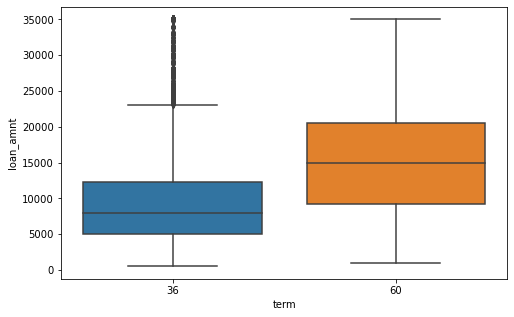

In [134]:
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sp.boxplot(x=df.term, y=df.loan_amnt)

Text(0, 0.5, 'Loan Amount')

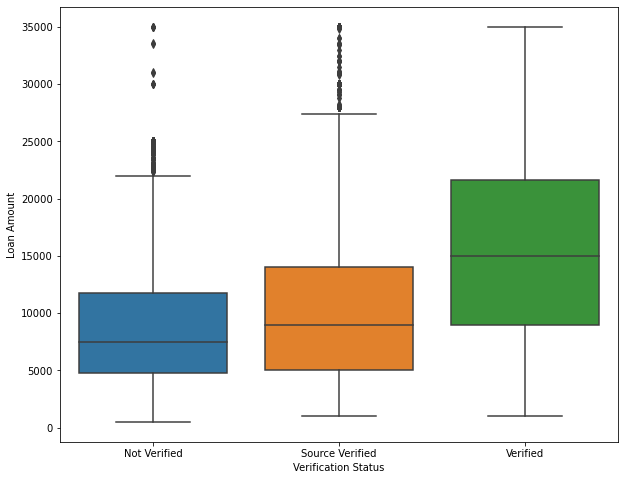

In [135]:
# Boxplot of Verification Status and Loan Amount
plt.figure(figsize=(10,8))
sp.boxplot(x=df.verification_status, y=df.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [136]:
purp_loan= ['purpose', 'loan_status']
cm = sp.light_palette("green", as_cmap=True)
pd.crosstab(df[purp_loan[0]], df[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484


/Users/ptechsvy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

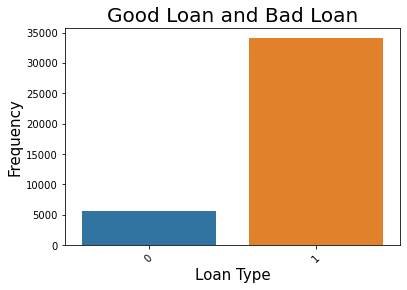

In [137]:
# Countplot of Good Loans and Bad Loans
g= sp.countplot(df["Loan_Class"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

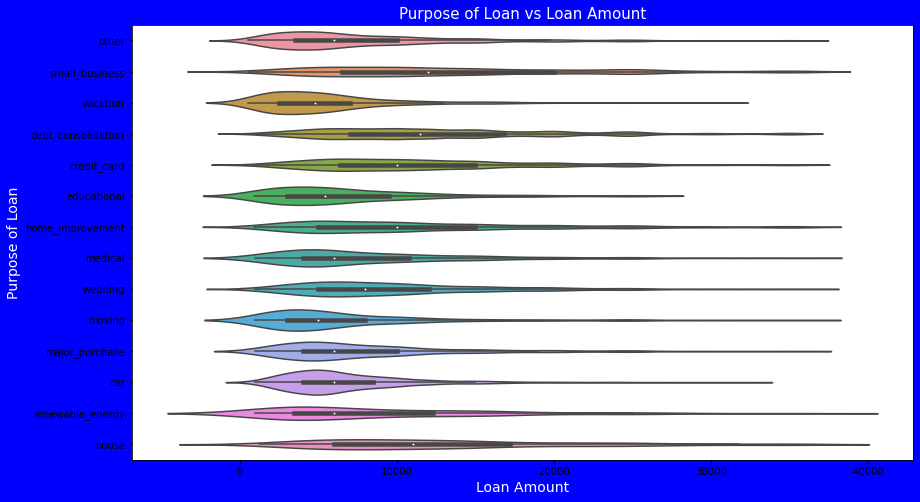

In [150]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sp.violinplot(y='purpose', x='loan_amnt', data =df)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()


# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

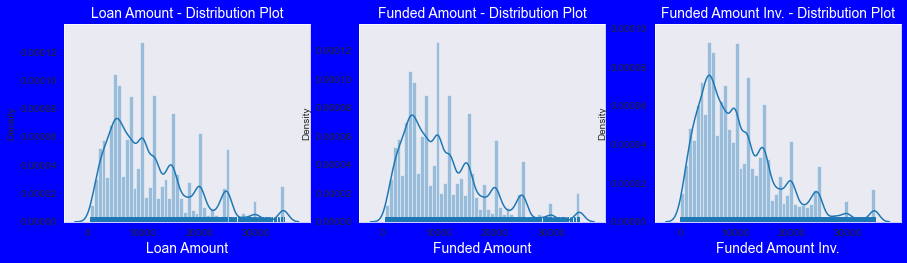

In [154]:
##Univariate Analysis
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sp.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sp.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sp.distplot(df['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sp.distplot(df['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.


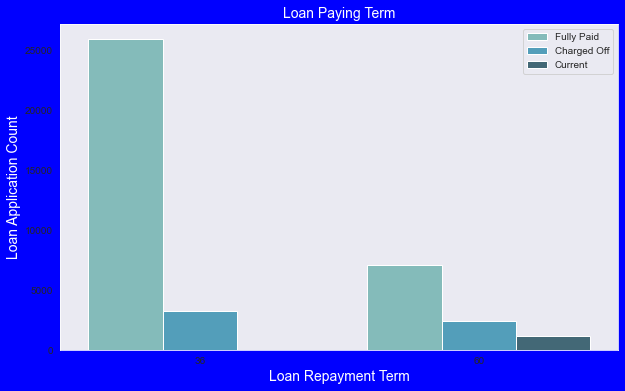

In [155]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sp.countplot(x="term",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

In [156]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599
